In [55]:
import numpy as np
from qiskit import *
%matplotlib inline
import matplotlib.pyplot as plt
shots = 4096

# algorytm Grovera dla n=2

### rozwiązanie książkowe

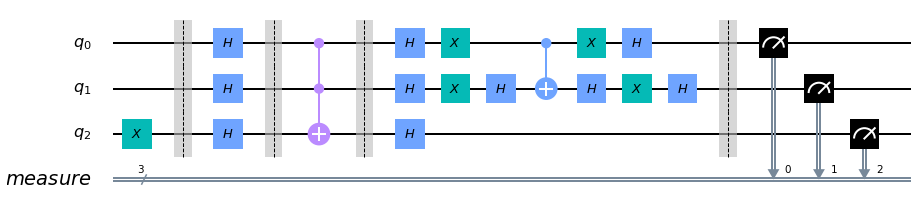

In [56]:
# noinspection JupyterKernel
circ = QuantumCircuit(3)
circ.x(2)
circ.barrier()
circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier()
# wyrocznia
circ.toffoli(0,1,2)
circ.barrier()
# inwersja
circ.h(0)
circ.h(1)
circ.h(2)
circ.x(1)
circ.x(0)
circ.h(1)
circ.cnot(0,1)
circ.h(1)
circ.x(0)
circ.x(1)
circ.h(0)
circ.h(1)

circ.measure_all()
circ.draw()

{'111': 4096}
Job Status: job has successfully run


Credentials are already in use. The existing account in the session will be replaced.


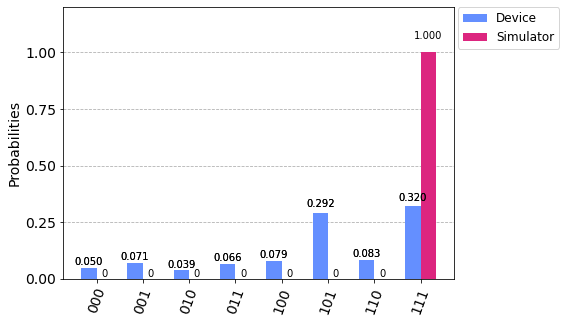

In [57]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=shots)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)

from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
# provider.backends()

backend = provider.get_backend('ibmq_london')

from qiskit.tools.monitor import job_monitor

job_exp = execute(circ, backend=backend, shots=shots)
job_monitor(job_exp)

result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
from qiskit.visualization import plot_histogram
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])
#

### rozwiązanie z optymalizacjami qiskit

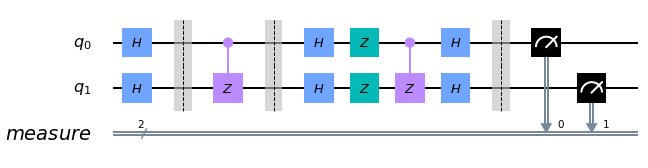

In [58]:
# noinspection JupyterKernel
circq = QuantumCircuit(2)
circq.h(0)
circq.h(1)
circq.barrier()
# wyrocznia

circq.cz(0,1)

circq.barrier()
# inwersja
circq.h(0)
circq.h(1)
circq.z(1)
circq.z(0)
circq.cz(0,1)
circq.h(0)
circq.h(1)

circq.measure_all()
circq.draw()

{'111': 4096}
Job Status: job has successfully run


Credentials are already in use. The existing account in the session will be replaced.


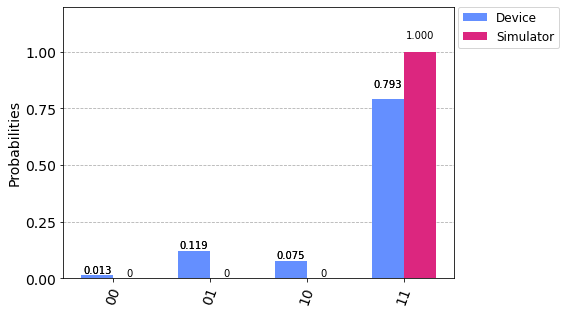

In [62]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circq, backend_sim, shots=shots)
result_sim = job_sim.result()
countsq = result_sim.get_counts(circq)
print(counts)

from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
# provider.backends()

backend = provider.get_backend('ibmq_london')

from qiskit.tools.monitor import job_monitor

job_exp = execute(circq, backend=backend, shots=shots)
job_monitor(job_exp)

result_exp = job_exp.result()
counts_expq = result_exp.get_counts(circq)
from qiskit.visualization import plot_histogram
plot_histogram([counts_expq,countsq], legend=['Device', 'Simulator'])
#

# porównanie obu rozwiązań

W pierwszym rozwiązaniu wykorzystano 17 bramek kwantowych.
W drugim tylko 10.

Text(0.5, 0.98, 'Porównanie rozwiązań')

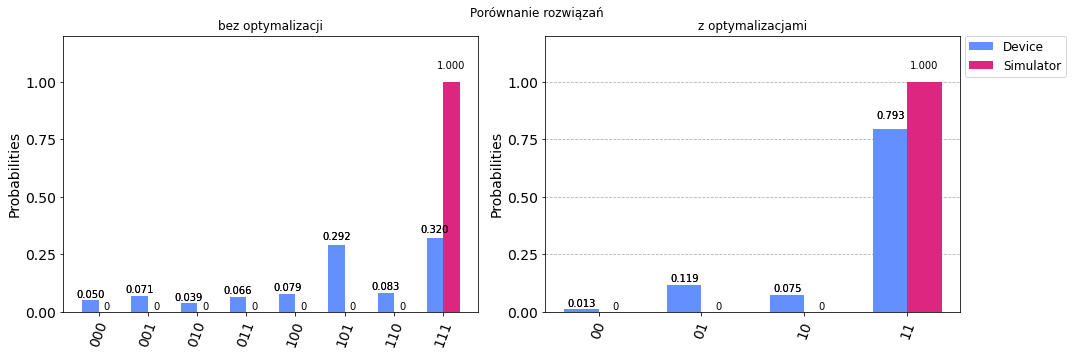

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plot_histogram([counts_exp,counts], ax=ax[0])
ax[0].set_title("bez optymalizacji")
plot_histogram([counts_expq,countsq], legend=['Device', 'Simulator'], ax=ax[1])
ax[1].set_title("z optymalizacjami")
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle("Porównanie rozwiązań")

W przypadku symulatora, który nie podlega dekoherencji, wyniki dla obu rozwiązań są jednoznaczne i prawidłowe.
Wykorzystanie mniejszej ilości bramek w drugim rozwiązaniu daje znacząco lepsze efekty na rzeczywistym komputerze kwantowym: prawdopodobieństwo prawidłowego wyniku jest ponad dwukrotnie wyższe.